#AcademicGatorAid Data Exploration

- By Nathan Schoedl and Jiahe Yao 

In [310]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

## Import and Prepare Training Data 
First we will perform data preprocessing to later explore the data we are working with.

In [311]:
# import data
url = 'https://raw.githubusercontent.com/nate2048/AI_HACKS_22/main/graduation_rate.csv'
df = pd.read_csv(url)

In [312]:
# rename columns
df = df.rename(columns={'ACT composite score':'ACT', 'SAT total score':'SAT', 
                        'parental level of education':'PHLE', 'parental income':'p_income',
                        'high school gpa':'hs_gpa', 'college gpa':'c_gpa', 'years to graduate':'ytg'})

In [313]:
# transform ordinal data into numerical
df['PHLE'].replace(['some high school', 'high school', 
                                           'some college', 'associate\'s degree'
                                           , 'bachelor\'s degree', 'master\'s degree']
                                          , [0,1,2,3,4,5], inplace=True)

In [314]:
# perform a normal transformation on SAT to be able to standardize this test to 
# other test such as the ACT

SAT = df['SAT'].values.reshape(-1, 1)
normal_SAT = QuantileTransformer(n_quantiles=500, output_distribution='normal').fit(SAT)
df['SAT'] = normal_SAT.transform(SAT)

In [315]:
# coorelation to test for variables that are highly coorelated

df.corr()

,ACT,SAT,PHLE,p_income,hs_gpa,c_gpa,ytg
ACT,1.000000,0.880746,0.303980,0.183879,0.874206,0.507349,-0.129880
SAT,0.880746,1.000000,0.430884,0.248544,0.898196,0.518436,-0.122640
PHLE,0.303980,0.430884,1.000000,0.649509,0.398772,0.366635,-0.168434
p_income,0.183879,0.248544,0.649509,1.000000,0.227238,0.460863,-0.239500
hs_gpa,0.874206,0.898196,0.398772,0.227238,1.000000,0.492489,-0.119524
c_gpa,0.507349,0.518436,0.366635,0.460863,0.492489,1.000000,-0.467499
ytg,-0.129880,-0.122640,-0.168434,-0.239500,-0.119524,-0.467499,1.000000


In [316]:
# If we were performing linear regression we would want to ommit the variables
# that have strong colinearity. However, for the purpose of data exploration we
# will leave in all variables other than years to graduate. 

df = df[['ACT','SAT','p_income','PHLE','hs_gpa','c_gpa']]

##Data Visualization
Here we will form groups in the data that will recogize high performing students to low performing students. To visualize this phenomemon we will reduce the dimension of data from $\mathbb{R}^6 \to \mathbb{R}^2$.

In [317]:
# use KMeans to group higher dimensional data into two groups

km = KMeans(n_clusters=2)
km.fit(df.values.reshape(-1, 6))
centers = km.cluster_centers_.reshape(-1, 6)
colors = km.labels_

In [318]:
# use TSNE to reduce data to 2 dimensions

dim_red = TSNE(n_components = 2, n_iter = 300, perplexity = 5, random_state = 444) #444
dim_red.fit(df.values.reshape(1000, -1))
df_reduced = dim_red.embedding_ 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


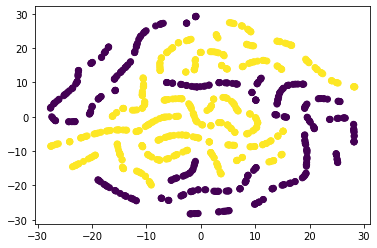

In [319]:
# plot scatter plot 
plt.scatter(*df_reduced.T, c = colors) 

##Interpretation
Notice that there are two distinct groups of points in the graph above. This displays that KMeans was able to succesfully group the data to form groups around similar attributes. Futhermore, this displays that the magnitude of the variables are correlated which allows for this pattern to form. Now we will explore the difference between the groups:

In [321]:
# compare the difference between cluster center 0 and cluster center 1

print(f"Difference in ACT: {centers[0][0] - centers[1][0]:.2f}")
print(f"Difference in Standardized SAT: {centers[0][1] - centers[1][1]:.2f}")
print(f"Difference in Family income: {centers[0][2] - centers[1][2]:.2f}")
print(f"Difference in Highest form of education: {centers[0][3] - centers[1][3]:.2f}")
print(f"Difference in highschool GPA: {centers[0][4] - centers[1][4]:.3f}")
print(f"Difference in college GPA: {centers[0][5] - centers[1][5]:.2f}")

Difference in ACT: 0.84
Difference in Standardized SAT: 0.41
Difference in Family income: 31551.53
Difference in Highest form of education: 1.64
Difference in highschool GPA: 0.107
Difference in college GPA: 0.18


As shown from these differences, the group of people that are likely to have a better GPA and test scores also tend to come from more affluent families and have parents that completed a higher form of education. 